## Load dataset

In [1]:
import pandas as pd

df = pd.read_csv('tmp/20230626-dataset-notices-with-cpv-and-budget.csv')
df.tail()

notice_id                                        notice_type  \
67691  120755-2018                             Additional information   
67692  036925-2022                              Contract award notice   
67693  049966-2023                                    Contract notice   
67694  294702-2022  Prior information notice without call for comp...   
67695  350876-2014                                     Contract award   

       publication_date reference_notice_id         version  \
67691        20180320.0   2018/S 043-093186  R2.0.9.S02.E01   
67692        20220124.0   2021/S 140-371431  R2.0.9.S05.E01   
67693        20230125.0                 NaN  R2.0.9.S05.E01   
67694        20220603.0                 NaN  R2.0.9.S05.E01   
67695        20141016.0   2014/S 119-211252  R2.0.8.S02.E01   

                                                   title  \
67691                                                NaN   
67692  Pilot Project: Developing a Farmers Toolbox fo...   
67693  Second Phase Pilot Programme European Diplomat...   
67694  G2 System Support Phase CDE Security and PRS E...   
67695  Study and systematic investigation for distrib...   

                                       short_description  object_type  \
67691                                                NaN          LOT   
67692  Converting Farm Accountancy Data Network (FADN...  PROCUREMENT   
67693  A second phase of the pilot project Towards th...  PROCUREMENT   
67694  The G2 system engineering technical assistance...  PROCUREMENT   
67695  In Europe while fairly consolidated knowledge ...  PROCUREMENT   

            lot  estimated_value estimated_value_currency  min_value  \
67691  all lots              NaN                      NaN        NaN   
67692       NaN        1875000.0                      EUR  1835000.0   
67693       NaN         960000.0                      EUR        NaN   
67694       NaN       54700000.0                      EUR        NaN   
67695       NaN              NaN                      NaN    90000.0   

      min_value_currency  max_value max_value_currency  
67691                NaN        NaN                NaN  
67692                EUR  1835000.0                EUR  
67693                NaN        NaN                NaN  
67694                NaN        NaN                NaN  
67695                EUR    90000.0                EUR

In [2]:
grouped_df = df.groupby("notice_id", group_keys=False).apply(
    lambda x: x.assign(lot_count=max((x["object_type"] == "LOT").sum(), 1))).copy()
grouped_df.head(20)

notice_id             notice_type  publication_date reference_notice_id  \
0   260146-2021         Contract notice        20210525.0   2021/S 046-114530   
1   448671-2015         Contract notice        20151222.0                 NaN   
2   450794-2016   Contract award notice        20161222.0                 NaN   
3   064176-2015         Contract notice        20150224.0                 NaN   
4   181172-2020  Additional information        20200420.0   2020/S 045-105610   
5   383994-2015  Additional information        20151031.0   2015/S 168-305801   
6   216350-2015  Additional information        20150624.0   2014/S 169-299861   
7   124994-2016   Contract award notice        20160413.0   2015/S 036-060453   
8   124994-2016   Contract award notice        20160413.0   2015/S 036-060453   
9   124994-2016   Contract award notice        20160413.0   2015/S 036-060453   
10  124994-2016   Contract award notice        20160413.0   2015/S 036-060453   
11  124994-2016   Contract award notice        20160413.0   2015/S 036-060453   
12  124994-2016   Contract award notice        20160413.0   2015/S 036-060453   
13  124994-2016   Contract award notice        20160413.0   2015/S 036-060453   
14  124994-2016   Contract award notice        20160413.0   2015/S 036-060453   
15  124994-2016   Contract award notice        20160413.0   2015/S 036-060453   
16  124994-2016   Contract award notice        20160413.0   2015/S 036-060453   
17  124994-2016   Contract award notice        20160413.0   2015/S 036-060453   
18  124994-2016   Contract award notice        20160413.0   2015/S 036-060453   
19  124994-2016   Contract award notice        20160413.0   2015/S 036-060453   

           version                                              title  \
0   R2.0.9.S04.E01  Technical Assistance to the Implementation of ...   
1   R2.0.8.S02.E01  Works to rehabilitate the road between Agadez ...   
2   R2.0.9.S01.E01  Planning supply installation and commissioning...   
3   R2.0.8.S02.E01  Provision of support to EDA meetings with a ma...   
4   R2.0.8.S04.E01  IPA Technical Assistance to the Government of ...   
5   R2.0.8.S02.E01  IPA Supply of equipment for Improving the qual...   
6   R2.0.8.S02.E01  AO 10523: Maintenance evolution and assistance...   
7   R2.0.8.S02.E01  Open call for tender for a multiple framework ...   
8   R2.0.8.S02.E01                                                NaN   
9   R2.0.8.S02.E01                                                NaN   
10  R2.0.8.S02.E01                                                NaN   
11  R2.0.8.S02.E01                                                NaN   
12  R2.0.8.S02.E01                                                NaN   
13  R2.0.8.S02.E01                                                NaN   
14  R2.0.8.S02.E01                                                NaN   
15  R2.0.8.S02.E01                                                NaN   
16  R2.0.8.S02.E01                                                NaN   
17  R2.0.8.S02.E01                                                NaN   
18  R2.0.8.S02.E01                                                NaN   
19  R2.0.8.S02.E01                                                NaN   

                                    short_description  object_type  lot  \
0   The objective of the Ukraine Public Buildings ...  PROCUREMENT  NaN   
1   Tenders are to be valid for 90 days from the f...  PROCUREMENT  NaN   
2   Planning supply installation and commissioning...  PROCUREMENT  NaN   
3   Provision of support to EDA meetings with a ma...  PROCUREMENT  NaN   
4                                                 NaN  PROCUREMENT  NaN   
5                                                 NaN  PROCUREMENT  NaN   
6                                                 NaN  PROCUREMENT  NaN   
7   A multiple framework contract in 12 lots for t...  PROCUREMENT  NaN   
8                                                 NaN          LOT    4   
9                   

In [3]:
grouped_df = grouped_df[grouped_df["object_type"] == "PROCUREMENT"]
grouped_df['title_texte'] = (grouped_df["title"].fillna("") + " "
                             + grouped_df["short_description"].fillna(""))
grouped_df = grouped_df.drop('title', axis=1)
grouped_df = grouped_df.drop('short_description', axis=1)
grouped_df = grouped_df.drop('lot', axis=1)
grouped_df = grouped_df.drop('publication_date', axis=1)
grouped_df = grouped_df.drop('notice_type', axis=1)
grouped_df = grouped_df.drop('reference_notice_id', axis=1)
grouped_df = grouped_df.drop('version', axis=1)
grouped_df = grouped_df.drop('object_type', axis=1)
grouped_df.tail()

notice_id  estimated_value estimated_value_currency  min_value  \
67690  120755-2018              NaN                      NaN        NaN   
67692  036925-2022        1875000.0                      EUR  1835000.0   
67693  049966-2023         960000.0                      EUR        NaN   
67694  294702-2022       54700000.0                      EUR        NaN   
67695  350876-2014              NaN                      NaN    90000.0   

      min_value_currency  max_value max_value_currency  lot_count  \
67690                NaN        NaN                NaN          1   
67692                EUR  1835000.0                EUR          1   
67693                NaN        NaN                NaN          1   
67694                NaN        NaN                NaN          1   
67695                EUR    90000.0                EUR          1   

                                             title_texte  
67690  Proofofprinciples testing of First Wall tile R...  
67692  Pilot Project: Developing a Farmers Toolbox fo...  
67693  Second Phase Pilot Programme European Diplomat...  
67694  G2 System Support Phase CDE Security and PRS E...  
67695  Study and systematic investigation for distrib...

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67696 entries, 0 to 67695
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   notice_id                 67694 non-null  object 
 1   notice_type               67694 non-null  object 
 2   publication_date          67694 non-null  float64
 3   reference_notice_id       31532 non-null  object 
 4   version                   67684 non-null  object 
 5   title                     44296 non-null  object 
 6   short_description         34269 non-null  object 
 7   object_type               67696 non-null  object 
 8   lot                       23363 non-null  object 
 9   estimated_value           20460 non-null  float64
 10  estimated_value_currency  21860 non-null  object 
 11  min_value                 21224 non-null  float64
 12  min_value_currency        21241 non-null  object 
 13  max_value                 21224 non-null  float64
 14  max_va

## Only keep notices with actual budgetary value

In [5]:
actual_value_df = grouped_df[(grouped_df["min_value"] == grouped_df["max_value"])
                             & grouped_df["min_value"].notna()
                             & (grouped_df["min_value_currency"] == "EUR")]
actual_value_df = actual_value_df.rename(columns={"min_value": "value"})
actual_value_df = actual_value_df.drop('estimated_value', axis=1)
actual_value_df = actual_value_df.drop('estimated_value_currency', axis=1)
actual_value_df = actual_value_df.drop('min_value_currency', axis=1)
actual_value_df = actual_value_df.drop('max_value', axis=1)
actual_value_df = actual_value_df.drop('max_value_currency', axis=1)

In [6]:
actual_value_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12169 entries, 2 to 67695
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   notice_id    12169 non-null  object 
 1   value        12169 non-null  float64
 2   lot_count    12169 non-null  int64  
 3   title_texte  12169 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 475.4+ KB


In [7]:
actual_value_df = actual_value_df.drop_duplicates(subset=["title_texte"], keep=False)

In [8]:
actual_value_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11393 entries, 2 to 67695
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   notice_id    11393 non-null  object 
 1   value        11393 non-null  float64
 2   lot_count    11393 non-null  int64  
 3   title_texte  11393 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 445.0+ KB


## Encode texts using sentence transformer model

In [9]:
from sentence_transformers import SentenceTransformer

embedder = SentenceTransformer('all-MiniLM-L6-v2')

In [10]:
corpus_occupations = actual_value_df["title_texte"].to_list()
corpus_occupations_embeddings = embedder.encode(corpus_occupations, convert_to_tensor=True, show_progress_bar=True)

Batches:   0%|          | 0/357 [00:00<?, ?it/s]

In [11]:
import torch

In [12]:
torch.save(corpus_occupations_embeddings, "tmp/20230626-embeddings.pkl")

In [13]:
corpus_occupations_embeddings = torch.load("tmp/20230626-embeddings.pkl")

## Save values of top-20 most similar notices

In [14]:
from sentence_transformers import util


def top_20_values(query) -> list[tuple[float, int]]:
    k = 20
    query_embedding = embedder.encode(query, convert_to_tensor=True)
    cos_scores = util.cos_sim(query_embedding, corpus_occupations_embeddings)[0]
    top_results = torch.topk(cos_scores, k=k + 1)
    values = []
    for score, idx in list(zip(top_results[0], top_results[1])):
        doc = actual_value_df.iloc[int(idx)]
        if doc["title_texte"] != query:
            values.append((doc["value"], doc["lot_count"]))
        if len(values) == k:
            break
    assert len(values) == k, f"{len(values)}"
    return values

In [15]:
from tqdm import tqdm

tqdm.pandas()

actual_value_df["top_20_values"] = actual_value_df["title_texte"].progress_apply(top_20_values)

100%|██████████| 11393/11393 [04:23<00:00, 43.29it/s]


In [16]:
actual_value_df.to_csv("tmp/20230626-similar-texts-lots-with-actual-value.csv")

In [17]:
actual_value_df = pd.read_csv("tmp/20230626-similar-texts-lots-with-actual-value.csv")
actual_value_df["top_20_values"] = actual_value_df["top_20_values"].apply(eval)

In [18]:
actual_value_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11393 entries, 0 to 11392
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     11393 non-null  int64  
 1   notice_id      11393 non-null  object 
 2   value          11393 non-null  float64
 3   lot_count      11393 non-null  int64  
 4   title_texte    11393 non-null  object 
 5   top_20_values  11393 non-null  object 
dtypes: float64(1), int64(2), object(3)
memory usage: 534.2+ KB


## Compare actual value with average actual value of top-K most similar notices

In [61]:
def predict_value(lot_count: int, top_similar_values: list[tuple[float, int]]):
    return lot_count * sum(v / n for v, n in top_similar_values) / len(top_similar_values)

In [55]:
def difference(df, k):
    return df.apply(lambda r: r["value"] - predict_value(r["lot_count"], r["top_20_values"][:k]), axis=1).abs()

In [56]:
def relative_difference(df, k):
    df = df[df["value"] != 0]
    return df.apply(
        lambda r: (r["value"] - predict_value(r["lot_count"], r["top_20_values"][:k])) / r["value"], axis=1).abs()

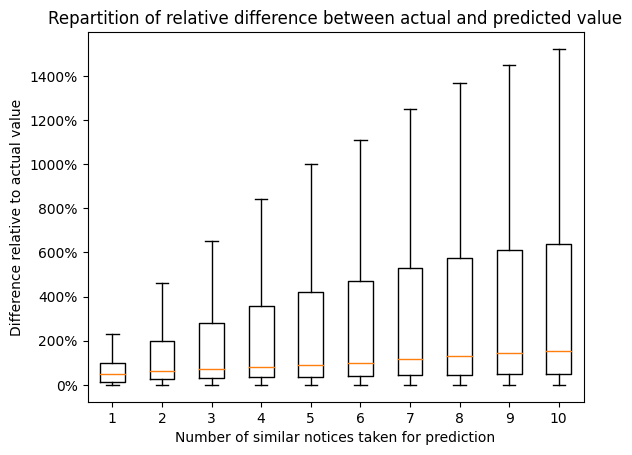

In [57]:
from matplotlib import ticker, pyplot as plt

differences = [relative_difference(actual_value_df, k) * 100 for k in range(1, 11)]
plt.boxplot(differences, showfliers=False)
plt.title("Repartition of relative difference between actual and predicted value")
plt.xlabel("Number of similar notices taken for prediction")
plt.gca().yaxis.set_major_formatter(ticker.FormatStrFormatter('%.0f%%'))
plt.ylabel("Difference relative to actual value")
plt.show()

In [58]:
import numpy as np
from matplotlib import ticker

differences = [relative_difference(actual_value_df, k) * 100 for k in range(1, 2)]
plt.boxplot(differences, showfliers=False)
plt.title("Repartition of relative difference between actual and predicted value\nwhen taking 1 similar notice")
plt.gca().yaxis.set_major_formatter(ticker.FormatStrFormatter('%.0f%%'))
plt.ylabel("Difference relative to actual value")
plt.xticks([])
quantiles = np.quantile(differences, np.array([0.25, 0.50, 0.75]))
plt.hlines(quantiles, [0.5] * quantiles.size, [1] * quantiles.size,
           color='b', ls=':', lw=1, zorder=0)
plt.yticks(sorted(set(list(quantiles) + list(range(0, 300, 50)))))
plt.show()

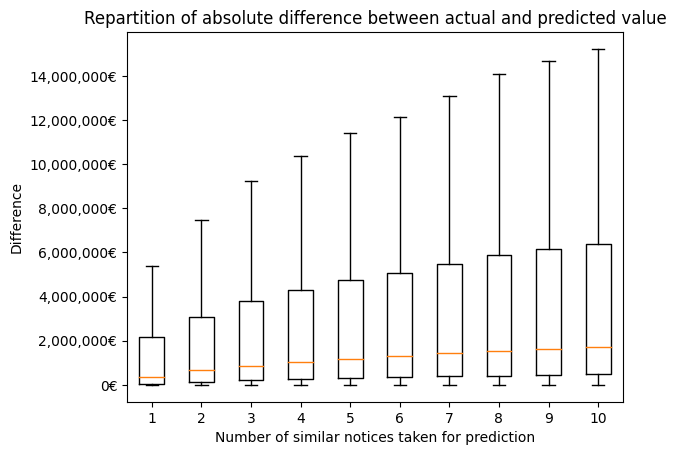

In [59]:
from matplotlib import ticker, pyplot as plt

differences = [difference(actual_value_df, k) for k in range(1, 11)]
plt.boxplot(differences, showfliers=False)
plt.title("Repartition of absolute difference between actual and predicted value")
plt.xlabel("Number of similar notices taken for prediction")
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: f"{x:,.0f}€"))
plt.ylabel("Difference")
plt.show()

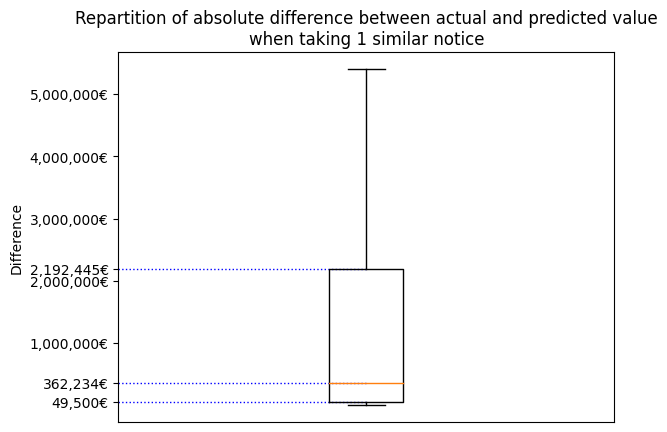

In [60]:
import numpy as np
from matplotlib import ticker

differences = [difference(actual_value_df, k) for k in range(1, 2)]
plt.boxplot(differences, showfliers=False)
plt.title("Repartition of absolute difference between actual and predicted value\nwhen taking 1 similar notice")
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: f"{x:,.0f}€"))
plt.ylabel("Difference")
plt.xticks([])
quantiles = np.quantile(differences, np.array([0.25, 0.50, 0.75]))
plt.hlines(quantiles, [0.5] * quantiles.size, [1] * quantiles.size,
           color='b', ls=':', lw=1, zorder=0)
plt.yticks(sorted(set(list(quantiles) + list(range(1000000, 6000000, 1000000)))))
plt.show()